In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import lzma, pickle

load_dir = '../Data/'
save_dir = "../Plots/"

# Figure 8: Finite size scaling

---

In [2]:
graph=r"rrg"
d=3
N=10000
init=r"rnd"

g_s = r"graph_type"
d_s = r"$d$"
N_s = r"$N$"
i_s = r"init"

r_s = r"$\rho$"
l_s = r"$\lambda$"
del_s = r"$\delta$"
mo0t_s = r"$\widetilde{MO}_{t=0}$"
Rmse_s = r"$R_{MSE}$"
max_iter=20000

In [3]:
def load_df(name_file):
    file_name = name_file+".xz"
    with lzma.open(load_dir + file_name, "rb") as f:
        data_frame = pickle.load(f)

    mo0t_s = r"$\widetilde{MO}_{t=0}$"
    Rmse_s = r"$R_{MSE}$"
    data_frame = data_frame[(data_frame["o_type"]=="rho") & (data_frame["s_type"]=="delta")]
    data_frame[r_s] = data_frame["M"]
    data_frame["conv"] = data_frame["iteration"] < max_iter
    data_frame[del_s] = data_frame["S"]
    df_1000_s = data_frame[data_frame["S"]<0.005]
    df_1000_l = data_frame[(data_frame["S"]>=0.005) & (data_frame["S"]<0.09)]
    return data_frame, df_1000_s, df_1000_l


In [4]:
_,_,all_df = load_df("Fig8")

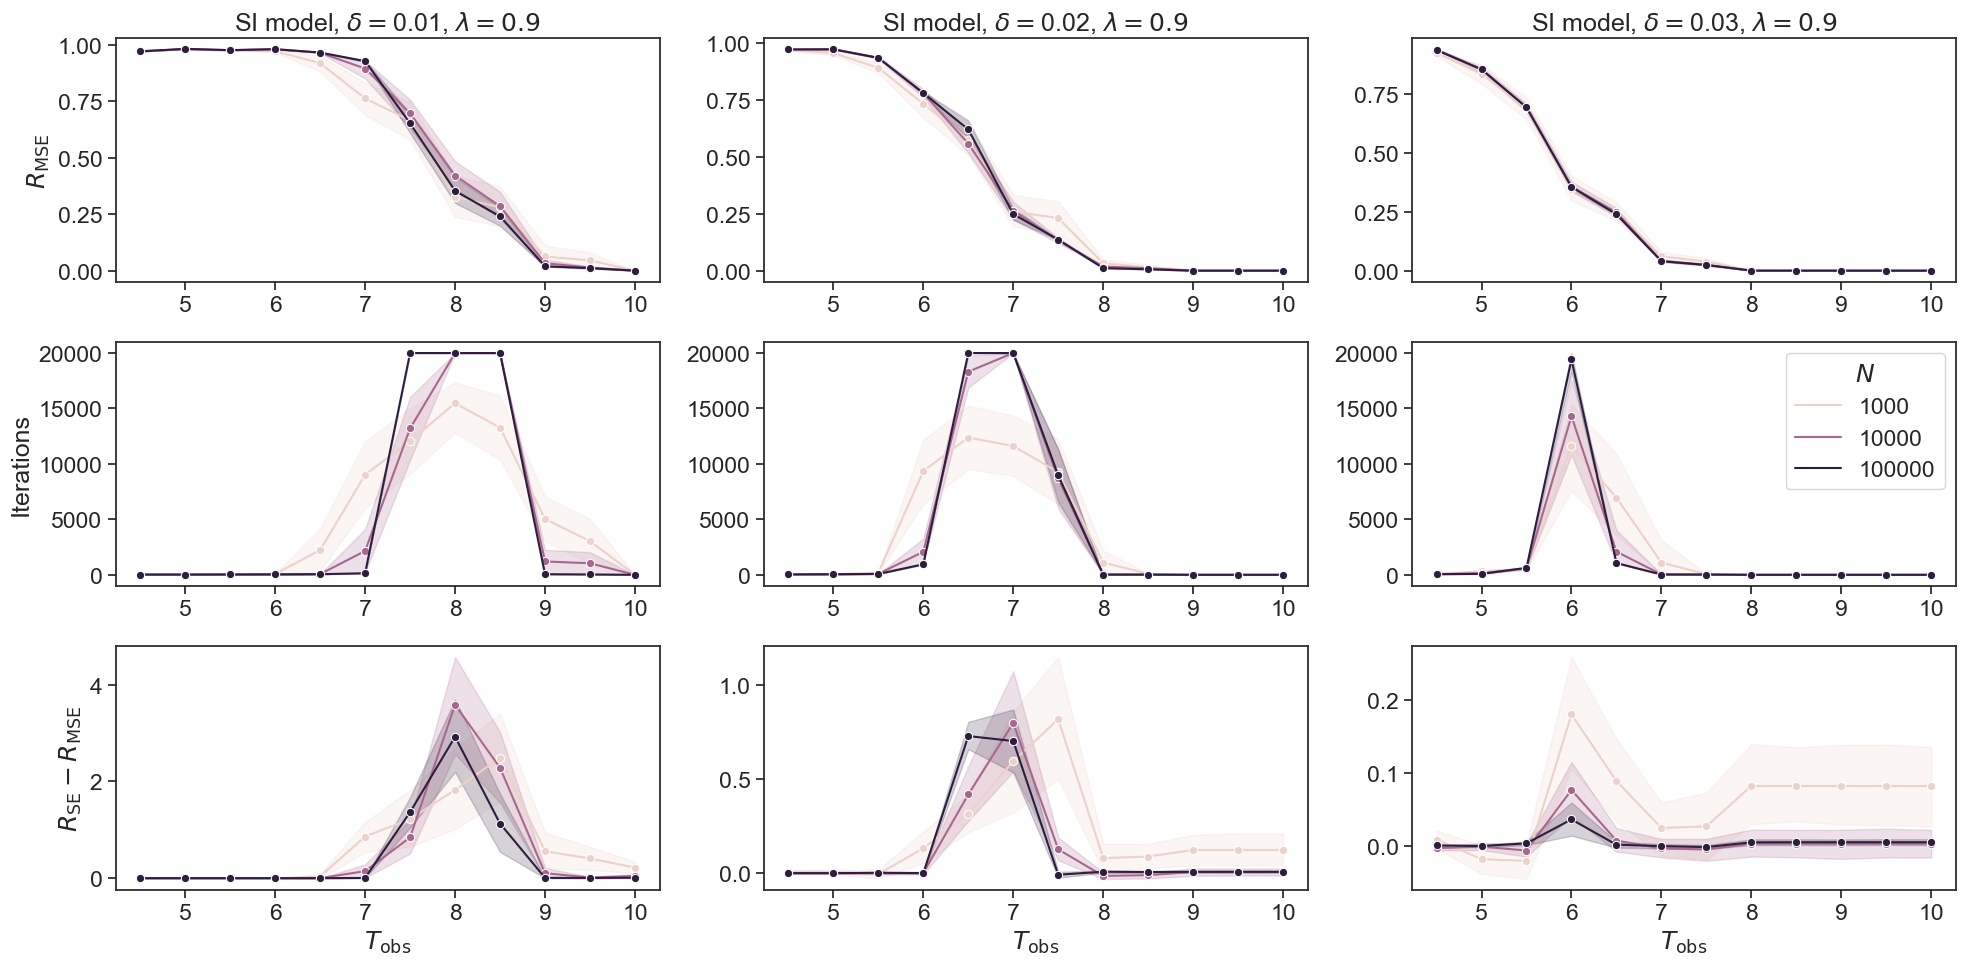

In [5]:
sns.set_theme(style="ticks", font_scale=1.5)
deltas=[0.01, 0.02, 0.03]
fig, axs = plt.subplots(3,len(deltas), figsize=(20, 10))

init="rnd"

for ii, dd in enumerate(deltas[:-1]):
    delta_all = all_df[(np.abs(all_df["S"]-dd)< 1e-6) & (all_df["init"]==init) & (all_df["$T_O$"]<=10) & (all_df["$T_O$"]>=5)]
    sns.lineplot(data=delta_all, x=r"snap_time", hue=r"$N$", y=r"iteration",legend=None, ax=axs[1][ii], estimator="mean",  marker="o", hue_norm=LogNorm(), errorbar=('ci', 80))
    axs[0][ii].set_title(f"SI model, $\delta=${dd}, $\lambda = 0.9$")
    
dd=deltas[-1]
delta_all = all_df[(np.abs(all_df["S"]-dd)< 1e-6) & (all_df["init"]==init)  & (all_df["$T_O$"]<=10) & (all_df["$T_O$"]>=5)]
sns.lineplot(data=delta_all, x=r"snap_time", hue=r"$N$", y=r"iteration",legend="full", ax=axs[1][-1], estimator="mean", marker="o", hue_norm=LogNorm())
axs[0][-1].set_title(f"SI model, $\delta=${dd}, $\lambda = 0.9$")

start, end = axs[0][-1].get_xlim()

for ii, dd in enumerate(deltas):
    delta_all = all_df[(np.abs(all_df["S"]-dd)< 1e-6) & (all_df["init"]==init) & (all_df["$T_O$"]<=10) & (all_df["$T_O$"]>=5) ]
    sns.lineplot(data=delta_all, x=r"snap_time", hue=r"$N$", y=r"$R_{MSE}$",legend=None, ax=axs[0][ii], estimator="mean",marker="o", hue_norm=LogNorm(), errorbar=('ci', 80))


for ii, dd in enumerate(deltas):
    delta_all = all_df[(np.abs(all_df["S"]-dd)< 1e-6) & (all_df["init"]==init) & (all_df["$T_O$"]<=10) & (all_df["$T_O$"]>=5) ]
    sns.lineplot(data=delta_all, x=r"snap_time", hue=r"$N$", y=r"$\delta SE$",legend=None, ax=axs[2][ii], estimator="mean",marker="o", hue_norm=LogNorm(), errorbar=('ci', 80))

for i in range(3):
    for j in range(len(deltas)):
        axs[i][j].set(xlabel=None)
for i in range(3):
    for j in range(len(deltas)):
        axs[i][j].set(ylabel=None)
for i in range(3):
    axs[-1][i].set_xlabel(r"${T_{\rm obs}}$")

axs[0][0].set_ylabel(r"$R_{\rm MSE}$")
axs[1][0].set_ylabel(r"Iterations")
axs[2][0].set_ylabel(r"$R_{\rm SE} - R_{\rm MSE}$")

plt.tight_layout()
plt.savefig(save_dir + "Figure8_ticks.pdf")
